In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import cv2
import os
from IPython.display import HTML
plt.rcParams['animation.embed_limit'] = 2**128
%matplotlib inline

### Example Frame from Scene One

((375, 1242, 3), <matplotlib.image.AxesImage at 0x7f1b21bfd180>)

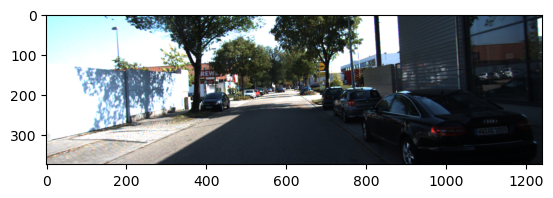

In [35]:
real_fname = 'kitti/training/image_02/0001/000000.png'
real_img = cv2.imread(real_fname) #
real_img = cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB) # convert BGR to RBG cause cv2 defaults to BGR
real_img.shape, plt.imshow(real_img)

((375, 1242, 3), <matplotlib.image.AxesImage at 0x7f1b23c87760>)

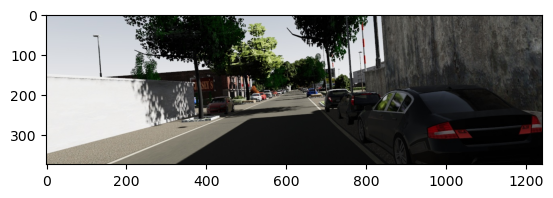

In [36]:
virt_fname = 'vkitti/Scene01/clone/frames/rgb/Camera_0/rgb_00000.jpg'
virt_img = cv2.imread(virt_fname)
virt_img = cv2.cvtColor(virt_img, cv2.COLOR_BGR2RGB) # convert BGR to RBG cause cv2 defaults to BGR
virt_img.shape, plt.imshow(virt_img)

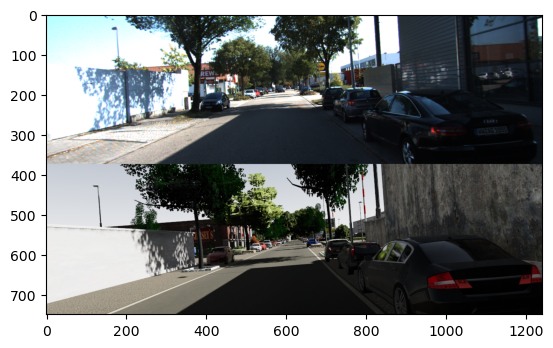

In [37]:
pair = np.concatenate((real_img, virt_img)) # pair frames for comparison
plt.imshow(pair)

## Animate Scene

In [105]:
def canny_edge(image):
    gray_conversion= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur_conversion = cv2.GaussianBlur(gray_conversion, (5,5),0)
    canny_conversion = cv2.Canny(blur_conversion, 50,150)
    return canny_conversion

In [94]:
def get_scene_frames(scene_number = 1, isCannyEdge = False):
    kitti_scene = f"kitti/training/image_02/00{scene_number:02}/"
    vkitti_scene = f"vkitti/Scene{scene_number:02}/clone/frames/rgb/Camera_0/"
    sorted_rframe_files = sorted(os.listdir(kitti_scene))
    sorted_vframe_files = sorted(os.listdir(vkitti_scene))
    frames = []
    for (rf, vf) in zip(sorted_rframe_files, sorted_vframe_files):
        # open real KITTI frame
        frame = cv2.imread(kitti_scene + rf)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # open virtual KITTI frame
        vframe = cv2.imread(vkitti_scene + vf)
        vframe = cv2.cvtColor(vframe, cv2.COLOR_BGR2RGB)
        # concatenate frames
        pair = np.concatenate((frame, vframe))
        if isCannyEdge:
            pair = canny_edge(pair)
        frames.append(pair)
    return frames

In [100]:
def animate_scene(frames, frame_frequency = 1):
    fig, ax = plt.subplots()
    ims = []
    for f in frames[::frame_frequency]:
        im = ax.imshow(f, animated=True)
        ims.append([im])
    ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)
    return ani

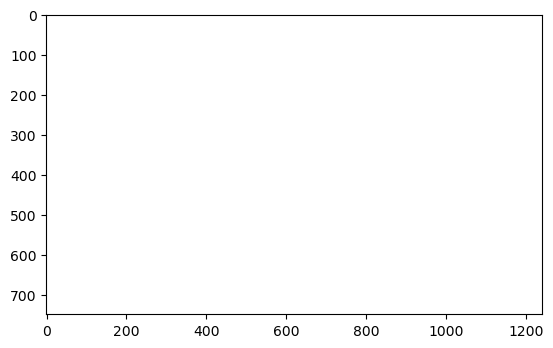

In [103]:
rgb_frames = get_scene_frames(scene_number = 6, isCannyEdge = False);
rgb_ani = animate_scene(frames = rgb_frames, frame_frequency = 10);

In [111]:
# HTML(rgb_ani.to_jshtml())

In [26]:
writer = animation.PillowWriter(
    fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("movie.gif", writer=writer)

## Edge Detection

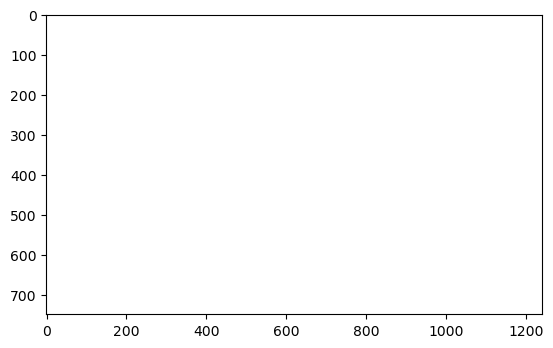

In [108]:
canny_frames = get_scene_frames(scene_number = 2, isCannyEdge = True);
canny_ani = animate_scene(frames = canny_frames, frame_frequency = 10);

In [110]:
# HTML(canny_ani.to_jshtml())